![Deep Learning for Scientists in a hurry](./fig/Title.png)

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2022-08-09T14:17:37.011745-04:00

Python implementation: CPython
Python version       : 3.10.5
IPython version      : 8.4.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 3.10.0-1160.24.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 40
Architecture: 64bit



In [3]:
import time
start = time.time()
chapter_number = 5
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn
import scipy

In [5]:
%watermark -iv

numpy     : 1.23.1
scipy     : 1.9.0
pandas    : 1.4.3
sklearn   : 1.1.2
matplotlib: 3.5.2



![Deep Learning for Scientists in a hurry](./fig/Title.png)

# A shallow introduction to Deep Learning

Let's start with a very simple challenge and use Deep Learning to solve it. In chapter 3 we will use Deep Learning engines but for this first exercise, all that we will use is the Python language and Numpy package. 

This is also a good opportunity to familiarize with Python programming and fill eventual gaps.

Python is an easy to learn Programming Language. Numpy is one of the most important packages created for Python, it is the de-facto standard for low-level numerical manipulation and we will use it extensively. 
Deep learning engines sometimes bring their numerical libraries but they are built to be similar to NumPy so what you will be learning here can be translated to those engines with little changes.

The purpose of this chapter is to present a typical classification problem and travel across all the steps for solving it using Deep Learning techniques. In the next chapter, we will take one step back and create a foundation for the concepts that will be introduced here.

## A simple classification problem: red dots and blue dots

Let's start with a purely academic problem. We will create a set of points in a 2D space. We will create those points using two normal distributions centered on different locations and spreaded in such a way that they overlap a bit.

The problem is to create a Deep Learning model that using examples of the points in those distributions is capable of differentiate from which distribution they come from.

Let's start with the creation of points and this is an excellent opportunity to introduce Numpy.

**Numpy** is a library for numerical operations in python and should be the first option for doing large numerical operations in Python. The big advantage of using Numpy over naively programming everything with internal Python objects such as sets, tuples or lists is that the objects in Numpy are operated internally by well-optimized routines. The basic  
object in Numpy is the NumPy array.

To use Numpy we need to import the library in our current Python execution:

In [6]:
import numpy as np

A NumPy array can be created from a Python list for example:

In [7]:
x = np.array([1,2,3,4,5,6])
x

array([1, 2, 3, 4, 5, 6])

Numpy is a very powerful library capable of creating a NumPy array with random values that follow a defined distribution. That is the next step here:

In [8]:
x = np.random.normal(size=1000)

We have created a NumPy array with 1000 elements that follow a normal distribution. We have not defined a center or standard deviation for the distribution, by default the center is the origin and the standard deviation is 1.

There is no point in printing 1000 values here, but we can get an idea from looking at some of them. Numpy is also powerful in array manipulation and slicing is a common operation in Machine Learning. here are some examples of slices from this array.

To get the first 10 elements in the array the slice looks like this:

In [9]:
x[:10]

array([-0.54110043,  0.45189475,  0.22151938,  1.12620209,  0.42795896,
       -0.49796863, -0.36309119,  2.17134226, -0.31685771,  0.81038399])

The first 5 elements from the array by skipping one element from the original array:

In [10]:
x[:10:2]

array([-0.54110043,  0.22151938,  0.42795896, -0.36309119, -0.31685771])

The last 10 elements:

In [11]:
x[-10:]

array([ 0.90118335, -2.14113512, -1.02723927,  2.00122883, -0.75855149,
        1.77223207,  1.13502178,  0.00452346, -0.83005139,  1.5747093 ])

It is important to know that when you are slicing NumPy arrays, you are not creating copies, just references on how to return elements from arrays. This is important because in Machine Learning we are often using very large arrays and doing copies could be a heavy burden not only from the memory usage but also the processing involved in creating copies of large amounts of data.

Let's make this clear with one example:

In [12]:
a = np.array([1,2,3,4,5,6])
b = a[::2]
b

array([1, 3, 5])

In [13]:
b[-1] = 999

In [14]:
a

array([  1,   2,   3,   4, 999,   6])

Notice how we have affected the array `a` by changing one value from the array `b` which is a split of `a`

now let's create a random distribution centered on 4 and with a standard deviation of 2:

In [15]:
x_sigma=2
x_mean=4
x = np.random.normal(size=1000, loc=x_mean, scale=x_sigma)

Now that we have one array of 1000 values a good way of making sense of large amounts of data is by making plots. **Matplotlib** is also the de-facto standard for general numerical plotting in Python. There are other libraries more specialized for data analysis such as `seaborn` which in turn works around matplotlib to create plots often used in more particular contexts.

In [16]:
import matplotlib.pyplot as plt

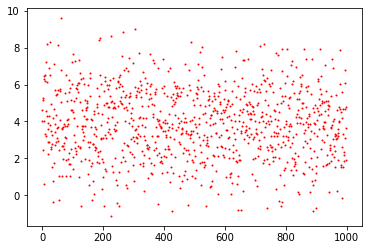

In [17]:
plt.plot(x, 'ro', ms=1);

We see 1000 points, we can visually realize that the center of the distribution is around 4. The standard deviation is not so evident in this kind of plot. Another way of looking these points is using a histogram instead. 

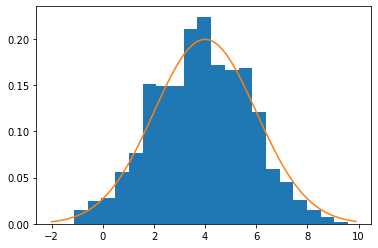

In [18]:
a=np.arange(-2,10,0.1)
b=1.0/(x_sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((a-4)/x_sigma)**2)
plt.hist(x, density=True, bins=20);
plt.plot(a,b);

The array `x` was created from a normal distribution. Without looking a the values can check that the center and standard deviation effectively correspond to 0 and 1 respectively, at least to a certain tolerance.

In [19]:
np.mean(x)

3.8660818510588686

In [20]:
np.std(x)

1.8848367856596948

Now let's create a 2D arrangement of points. There are several ways of achieving that. We can continue our reasoning and build two distributions and join them in a 2D array. Before that let's discuss how multidimensional arrays work in Numpy.

Numpy arrays can have multiple dimensions. The same data could be organized under several levels, for example:

In [21]:
x = np.arange(1,17)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [22]:
x.shape

(16,)

In [23]:
x.reshape(4,4)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [24]:
x.reshape(-1,16)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]])

In [25]:
x.reshape(16,-1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16]])

In [26]:
y = x.reshape((4,2,2))
y

array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16]]])

In [27]:
y.shape

(4, 2, 2)

In [28]:
y.ndim

3

Notice that in Numpy we have two concepts for arrays that have a different meanings in mathematics. The value `ndim` is often called the `rank` in mathematics when talking about tensors. We will devote more time in the next chapter to precise from the mathematical point of view all these concepts. For now, what matters is the fact that NumPy arrays can be represented under multiple arrangements called `shape`. Changing the shape does not change the way the data is stored internally in memory.

We can stack arrays and build from them arrays with more dimensions. Consider for example:

In [29]:
x = np.arange(10,20)
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [30]:
y = np.arange(80,90)
y

array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89])

In [31]:
np.stack((x,y),axis=1)

array([[10, 80],
       [11, 81],
       [12, 82],
       [13, 83],
       [14, 84],
       [15, 85],
       [16, 86],
       [17, 87],
       [18, 88],
       [19, 89]])

Notice that we have created a new 2D array by stacking elements coming from two arrays. We can use this to create a normal distribution of points in a 2D space. 

In [32]:
x = np.random.normal(loc=4, scale=0.2, size=1000)

In [33]:
y = np.random.normal(loc=3, scale=0.4, size=1000)

In [34]:
z1 = np.stack((x,y),axis=1)

In [35]:
z1

array([[4.08471388, 3.3780807 ],
       [3.90048744, 3.52526664],
       [3.79417216, 2.64482549],
       ...,
       [4.03911544, 2.83360637],
       [3.81059157, 3.28729193],
       [3.91506733, 3.44469576]])

As often happens in NumPy there is often a simpler solution. The function `numpy.random.normal` offers internal capabilities directly create those multidimensional distributions:

In [36]:
z2 = np.random.normal(loc=(3,4), scale=(0.4,0.2), size=(1000,2))
z2

array([[2.87773554, 3.86539119],
       [3.19676612, 3.98313621],
       [3.611428  , 3.85635881],
       ...,
       [3.4355714 , 4.13300874],
       [2.34643213, 3.91547972],
       [3.03372225, 4.16649693]])

In [37]:
np.mean(z2[:,0])

3.0072802014328226

In [38]:
np.mean(z2[:,1])

3.997531456022184

In [39]:
np.std(z2[:,0])

0.39451395139667533

In [40]:
np.std(z2[:,1])

0.20086976366541734

Now have two arrays representing 2D distributions located at different points and we would like to join them in a single array. 
In this case, we would like to `concatenate` the two arrays:

In [41]:
z = np.concatenate((z1,z2))
z.shape

(2000, 2)

There is another possibility of concatenation using an internal axis instead of the most external one (axis=0)

In [42]:
z = np.concatenate((z1,z2), axis=1)
z.shape

(1000, 4)

This is not what we want so we return to concatenation in the first axis. Notice that the default axis is 0, so the argument axis=0 is not needed.

In [43]:
z = np.concatenate((z1,z2), axis=0)
z.shape

(2000, 2)

We can now get an image of all these points with a simple plot:

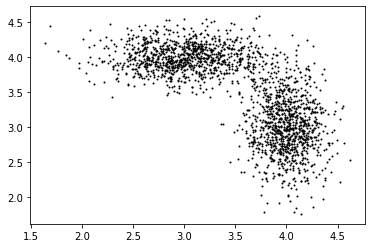

In [44]:
plt.plot(z[:,0],z[:,1], 'ko', ms=1);

For simple classes like this we can see that the tasks of identifying these two sets of point look feasible. The idea is not to write a code hardcoding our strategy to identify the two sets. The idea of machine learning is to create a code that will make the distinction based on examples that will be offered. 

To advance a bit in the task. Let's create an array to identify the two kinds of points. Numpy offers functions to generate arrays fill with zeros and ones. We will use those functions to concatenate two arrays with 1000 elements.

In [45]:
z_labels=np.concatenate((np.zeros(1000), np.ones(1000)))
z_labels.shape

(2000,)

In [46]:
z_labels==0

array([ True,  True,  True, ..., False, False, False])

Now we can plot to color the two sets using the labels that we set.

In [47]:
z_size=z.shape[0]
z_size

2000

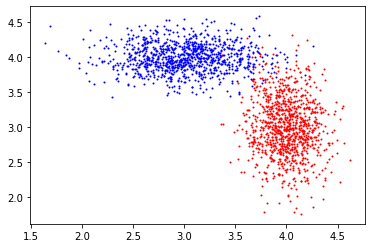

In [48]:
plt.plot(z[z_labels==0,0],z[z_labels==0,1], 'ro', ms=1)
plt.plot(z[z_labels==1,0],z[z_labels==1,1], 'bo', ms=1);

Notice that in this example the two colors are represented in relatively separate regions of space. However, the separation is not perfect. Such overlappings are common in low-dimensional cases like this. As we increase dimensionality the extra dimensions help us in the separation at expenses of not being capable of simple plots like this.

## The Perceptron

We want to create a code that is capable of making the tell us if a given position in space is more likely to belong to the blue or red dots by offering examples of blue and red dots and letting the code to *learn* from those examples.

A perceptron is a precursor of a neural network. A simple function that will help us to differentiate the two kinds of points. Behind the idea of a perceptron are many of the concepts behind Deep Learning.

Before entering into how perceptrons work let's prepare the data. In Machine Learning, data plays a central role. We use the data to build the model, make it better, and to demonstrate that is capable of producing meaninful results. In this case, we need to separate the data into at least two sets: **training** and **testing** datasets.

Notice that we have the two sets in a very particular setting. The first 1000 points are red (`z_labels==0`) and the other 1000 points are blue (`z_labels==1`).

For an effective construction of machine learning models, we need to scramble all these points so we have blue and red dots in no particular order. Numpy can help us with the scrambling too.

In [49]:
z_order=np.arange(2000)

In [56]:
np.random.shuffle(z_order)

In [57]:
z_order

array([ 616,  213, 1658, ..., 1180,  138,  164])

With the array `z_order` we can create two sets of values. We will devote 80%, ie 800 values for training and 20%, ie 200 values for testing. We will only use the training data and keep the test data to prove that our model is capable of offering good answers for unseen data.

In [58]:
z.shape

(2000, 2)

In [59]:
training_data=z[z_order][:int(0.8*z_size)]
training_data.shape

(1600, 2)

In [60]:
training_labels=z_labels[z_order][:int(0.8*z_size)]
training_labels.shape

(1600,)

In [61]:
testing_data=z[z_order][-int(0.2*z_size):]
testing_data.shape

(400, 2)

In [62]:
testing_labels=z_labels[z_order][-int(0.2*z_size):]
testing_labels.shape

(400,)

To prove that we have separated the two sets let plot training and testing sets with orange and green:

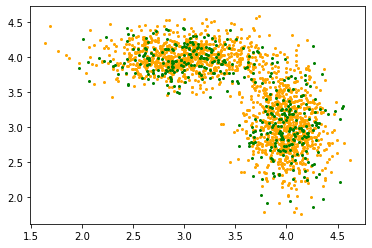

In [63]:
plt.plot(training_data[:,0],training_data[:,1], marker='o', ms=2, color='orange', ls='')
plt.plot(testing_data[:,0],testing_data[:,1], marker='o', ms=2, color='green', ls='');

Notice that orange dots are spread on both clusters and they are 80% of the points. Those are the training points. The other 20% is made of green points also spread on both clusters.

Our perceptron is a function that takes two entries, the position x and y of the points, and return a value. 

<div>
<img src="./fig/perceptron2D.svg" height="200" width="500" />
   </div>

We will start using a better notation that will help us generalize the perceptron to receive many inputs and move us in the direction of more complex neural networks. The $x$ coordinate will be called $x_1$ and the `y` coordinate it is now $x_2$. 

The idea is to use the two values to evaluate a function. Inside the function, we have a set of parameters $w_i$ and $b$ called weights and bias that we can tune to produce a desired result.

Will that help us to identify if a point is red or blue. Let's do some quick experiments.
For a moment let's return to the original set of all the red and blue points and we will explore the effect of different values of $b$, $w_1$, and $w_2$.

Notice that we are doing a detour. This is all the points and we know the color of each of them.
Lets start with a bias of zero $b=0$ and $w_1=1$ and $w_2=0$. Applying the function to all the points will result in:

In [64]:
def proj_x(x):
    b=0
    w1=1
    w2=0
    return b + w1*x[0] + w2*x[1]

In [67]:
z.shape

(2000, 2)

In [66]:
proj=np.apply_along_axis(proj_x, axis=1, arr=z)
proj

array([4.08471388, 3.90048744, 3.79417216, ..., 3.4355714 , 2.34643213,
       3.03372225])

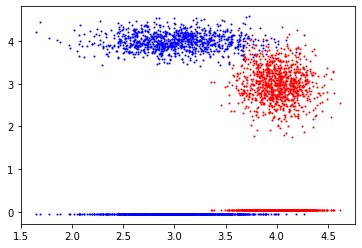

In [68]:
red=proj[z_labels==0]
plt.plot(red, np.zeros_like(red)+0.05, 'ro', ms=1)
blue=proj[z_labels==1]
plt.plot(blue, np.zeros_like(blue)-0.05, 'bo', ms=1);
plt.plot(z[z_labels==0,0],z[z_labels==0,1], 'ro', ms=1)
plt.plot(z[z_labels==1,0],z[z_labels==1,1], 'bo', ms=1);

The values $b=0$, $w_1=1$ and $w_2=0$ is just returning the coordinate $x$ from each point, discarding the $y$ coordinate. The $b=0$ means that the result is not shifted in any direction.

Similarly consider the other option: $b=0$, $w_1=0$ and $w_2=1$. In this case, we are projecting on the y axis, ie taking the $y$ coordinate and discarding the $x$ coordinate. 

In [69]:
def proj_y(x):
    b=0
    w1=0
    w2=1
    return b + w1*x[0] + w2*x[1]

In [70]:
proj=np.apply_along_axis(proj_y, axis=1, arr=z)
proj

array([3.3780807 , 3.52526664, 2.64482549, ..., 4.13300874, 3.91547972,
       4.16649693])

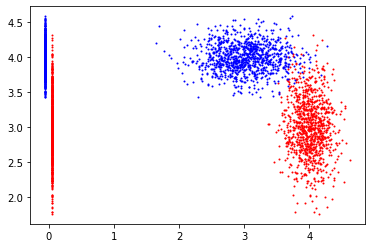

In [71]:
red=proj[z_labels==0]
plt.plot(np.zeros_like(red)+0.05, red, 'ro', ms=1)
blue=proj[z_labels==1]
plt.plot(np.zeros_like(blue)-0.05, blue, 'bo',ms=1);
plt.plot(z[z_labels==0,0],z[z_labels==0,1], 'ro', ms=1)
plt.plot(z[z_labels==1,0],z[z_labels==1,1], 'bo', ms=1);

In general, the Equation 

$$f(x) = b + \sum w_i \cdot x_i$$

is a projection. The role of $b$ is to shift the values and the sum is projecting the input values $x = (x_1, x_2, \cdots, x_n)$ over a given vector $(w_1, w_2, \cdots, w_n)$

It is standard to define the dot product of two vectors of length $l$ as

$$\vec{x} \cdot \vec{y} = \sum_{i=1}^l x_i \cdot y_i$$

As we saw, the idea of the dot product is geometrically equivalent to the projection of a vector on another. For two euclidean vectors $\mathbf{a}$ and $\mathbf{b}$ the dot product is:

$$\mathbf{a}\cdot\mathbf{b}=\|\mathbf{a}\|\ \|\mathbf{b}\|\cos\theta$$


The function of our perceptron is no other than the function of a dot product with an eventual shift given by a bias value.

It is important to understand the role of machine learning here. What we are doing to data with a function is to induce transformations. The transformed data could help us identify if a point is red or blue. In our case transformation could induce a loss of data. A projection is such a kind of transformation. There are other kinds of transformations that preserve the content or dimensionality of the data.


Notice that the two transformations we have done are not very good ideas. In both cases we have an important overlapping between red and blue points. The idea is not to tell the code which is the right transformation but to allow the algorithm to use examples to find the right transformation. That is the central theme of Machine Learning. The "learning" part of ML is the data-based search for correct transformations that could solve the problem.

Consider for example a "Human Learning" approximation just from our understanding of the role of the function we have in hands.

What about if $b=0$, $w_1=-1$ and $w_2=1$ 

In [72]:
def proj_naive(x):
    b=0
    w1=-1
    w2=1
    return b + w1*x[0] + w2*x[1]

In [73]:
proj=np.apply_along_axis(proj_naive, axis=1, arr=z)
proj

array([-0.70663318, -0.3752208 , -1.14934667, ...,  0.69743734,
        1.5690476 ,  1.13277468])

(-2.0, 2.0)

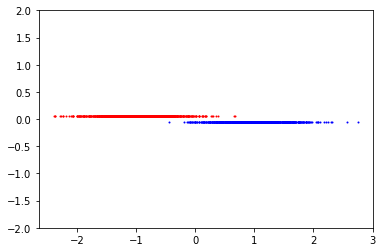

In [74]:
red=proj[z_labels==0]
plt.plot(red, np.zeros_like(red)+0.05, 'ro', ms=1)
blue=proj[z_labels==1]
plt.plot(blue, np.zeros_like(blue)-0.05, 'bo', ms=1);
plt.ylim(-2,2)

The function 

$$f(x) = -x_1 + x_2$$

is a projection of the points on an axis of $135^o$, ie the points were projected on an axis of $\frac{3\pi}{4}$. To exemplify this fact we will take the projections and recreate them over the axis so we can understand the effect.

In [75]:
def rotation(x):
    theta = 3*np.pi/4
    return np.array([x[0]*np.cos(theta)-x[1]*np.sin(theta), 
                     x[0]*np.sin(theta)+x[1]*np.cos(theta)])

In [76]:
x = np.vstack((proj, np.zeros_like(proj))).T

In [77]:
x_rot=np.apply_along_axis(rotation, axis=1, arr=x)

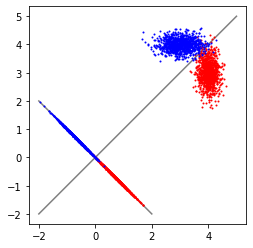

In [78]:
plt.plot([-2,5],[-2,5],color='0.5')
plt.plot([-2,2],[2,-2],color='0.5')

plt.plot(x_rot[z_labels==0,0],x_rot[z_labels==0,1], 'ro', ms=1)
plt.plot(x_rot[z_labels==1,0],x_rot[z_labels==1,1], 'bo', ms=1);

plt.plot(z[z_labels==0,0],z[z_labels==0,1], 'ro', ms=1)
plt.plot(z[z_labels==1,0],z[z_labels==1,1], 'bo', ms=1);

plt.gca().set_aspect('equal')

This is very close to the solution that we want. Can we create an algorithm that takes with it the responsibility of finding the right projection?

This will be the role of our perceptron. We are still a long way from complex neural networks but the basic ideas can be built from this example. 

Let's take back our training data:

In [79]:
training_data.shape

(1600, 2)

In [80]:
training_labels.shape

(1600,)

We can simplify the role of our perceptron by defining a new binary function that will return 0 or 1 based on the value of the original perceptron function:

$$f_\Phi (\vec{x}) = 
     \begin{cases}
         1 & \text{if} \; b + \vec{w} \cdot \vec{x} > 0 \\
         0 & \text{oherwise} \\
     \end{cases}
$$

We identify the function $b + \vec{w} \cdot \vec{x}$ as the *linear units*. For the current example just project elements on an axis. In the unidimensional case, they can be identified as the function of a line with slope $w$ and intercept $b$. This is why we call them *linear units*.

Perceptrons are very simple entities and there is a clear algorithm for finding the $b$ and $w_i$ values that will return the answer 1 for **most** the red dots and 0 for **most** blue dots. The reason why we say **most** instead of **all** is because there is an overlapping of points. There are some points that we cannot get right. This is inevitable here, we only have 2 dimensions and the two normal distributions will overlap to some extent.

What we are doing here is a binary classifier. The function $f_\Phi(\vec{x})$ returns 0 or 1, indicating if a point belongs to the red or non-red set of points. We will extend this idea later to multiclass classification where the answers will be integers from 0 to $m-1$.

### The perceptron algorithm

We will use the training set, in our case a list of 1600 pairs of values. Each value we will identify with a subscript ie $\vec{x}^k$ is the $k$-esime vector from our training set. The same will be done for the training labels, we will call them $a^k$ that will be 0 or 1.

The perceptron algorithm works like this:

1. Set $b$ and $w$'s to zero. To simplify these parameters we rename $b$ as $w_0$ as a weight which $x_0$ is always 1.


2. Compute the following as many times as we want or until all the $w$'s stop changing significantly 

    a. Take each element in our training set $\vec{x}^k$ and get the answer to the function $f(\vec{x})$
    
    b. Compare the answer that we want for $\vec{x}^k$ using the training labels $a^k$.
    
    If $f(\vec{x}) = a^k$ move to the next one. Otherwise, change the weights using the prescription:
    
    $\Delta w_i = (a^k - f(\vec{x}^k)) x_i$
    
Let's start using this algorithm with the training set.

In [81]:
x0=training_data[0]
a0=training_labels[0]

print(x0, a0)

[3.99323472 2.95177926] 0.0


In [82]:
w=np.zeros(3)
w

array([0., 0., 0.])

In [83]:
xx0 = np.concatenate((np.ones(1), x0))
xx0

array([1.        , 3.99323472, 2.95177926])

In [84]:
fx=np.dot(xx0, w)
fx

0.0

In [85]:
ffx = 1 if fx>0 else 0
ffx

0

We have computed $f(\vec{x}^0)=0$ and $a^0=1$. Here we need to change the weights.

In [86]:
w= (a0 - ffx)*xx0
w

array([0., 0., 0.])

We have new weights. Let's see for a moment what happens with them if we try the same value again.

In [87]:
fx=np.dot(xx0, w)
fx

0.0

In [88]:
ffx = 1 if fx>0 else 0
ffx

0

Now $f(\vec{x})$ returns 1 which is consistent with $a^0=1$.

Let's try the next value:

In [89]:
x1=training_data[1]
a1=training_labels[1]

print(x1, a1)

[3.76717954 3.1096887 ] 0.0


In [90]:
xx1 = np.concatenate((np.ones(1), x1))
xx1

array([1.        , 3.76717954, 3.1096887 ])

In [91]:
fx=np.dot(xx1, w)
fx

0.0

In [92]:
ffx = 1 if fx>0 else 0
ffx

0

We have computed $f(\vec{x}^1)=1$ and $a^1=0$. Here we need to change the weights.

In [93]:
w= w + (a1 - ffx)*xx1
w

array([0., 0., 0.])

In [94]:
fx=np.dot(xx1, w)
fx

0.0

In [95]:
ffx = 1 if fx>0 else 0
ffx

0

These new weights will return new values for the weights. Now let's work the algorithm across all the values in the training set:

In [96]:
w=np.zeros(3)
t_size = len(training_data)

for n in range(10):
    accuracy=0
    for i in range(t_size):
        xi = training_data[i]
        ai = training_labels[i]
        xxi = np.concatenate((np.ones(1), xi))
        fx = np.dot(xxi, w)
        ffx = 1 if fx>0 else 0
        if ai == ffx:
            accuracy = accuracy + 1
        else:
            w = w + (ai - ffx)*xxi
    print("After epoch %d the accuracy is %f" % (n, accuracy/t_size))

After epoch 0 the accuracy is 0.952500
After epoch 1 the accuracy is 0.957500
After epoch 2 the accuracy is 0.965000
After epoch 3 the accuracy is 0.969375
After epoch 4 the accuracy is 0.968125
After epoch 5 the accuracy is 0.968125
After epoch 6 the accuracy is 0.969375
After epoch 7 the accuracy is 0.969375
After epoch 8 the accuracy is 0.970000
After epoch 9 the accuracy is 0.970000


We have now weights that are capable to return good results for 98% of the training set. Remember that 100% is not attenable because there is some overlapping in the points. 

The weights are:

In [97]:
w

array([  5.        , -57.43083402,  46.69584796])

Now let's use our test set. This is our 20% that has not been used so far. If the algorithm is good will help us return with good answers for unseen data.

In [98]:
t_size = len(testing_data)

accuracy=0
for i in range(t_size):
    xi = testing_data[i]
    ai = testing_labels[i]
    xxi = np.concatenate((np.ones(1), xi))
    fx = np.dot(xxi, w)
    ffx = 1 if fx>0 else 0
    if ai == ffx:
        accuracy = accuracy + 1
print("The accuracy with the testing data is %f" % (accuracy/t_size))

The accuracy with the testing data is 0.890000


We have 99% of the points in the testing data correctly labeled by the function. We can also have a quick look at the right and wrong results from the entire data. Let's fill a new vector a_pred to store the predicted values from our perceptron.

In [99]:
t_size = len(z)
a_pred = np.zeros_like(z_labels)

for i in range(t_size):
    xi = z[i]
    xxi = np.concatenate((np.ones(1), xi))
    fx = np.dot(xxi, w)
    a_pred[i] = 1 if fx>0 else 0

We can count the number of wrong results for the entire dataset.

In [100]:
np.sum(np.abs(a_pred.astype(int)-z_labels.astype(int)))

213

Now plot the right and wrong values

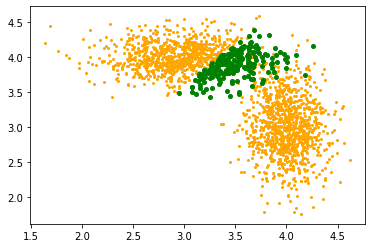

In [101]:
good=a_pred.astype(int)==z_labels.astype(int)
bad=a_pred.astype(int)!=z_labels.astype(int)
plt.plot(z[good,0],z[good,1], marker='o', ms=2, color='orange', ls='')
plt.plot(z[bad,0],z[bad,1], marker='o', ms=4, color='green', ls='');

As expected, the wrongly labeled points are those in the border between the two distributions.

---

# References

There are many books about Deep Learning and many more on Machine Learning. 
This list is by no means an exhaustive list of books. I am listing the books from which I took inspiration. Also, I am listing materials where I found better ways to present topics. Often I am amazed by how people can create approachable materials for seemingly dry subjects.

The order of the books goes from divulgation and practical to the more rigorous and mathematical. Slides, blogs, and videos are those I have found over the internet or suggested by others.

### Selection of Books on Deep Learning

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Kelleher" 
       src="./fig/books/Deep Learning - Kelleher.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      John D. Kelleher<br>
      2019<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Charniak" 
       src="./fig/books/Introduction to Deep Learning - Charniak.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Eugene Charniak<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Skansi" 
       src="./fig/books/Introduction to Deep Learning - Skansi.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Sandro Skansi<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Subramanian" 
       src="./fig/books/Deep Learning with PyTorch - Subramanian.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Vishnu Subramanian<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Stevens" 
       src="./fig/books/Deep Learning with PyTorch - Stevens.png" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Eli Stevens, Luca Artiga and Thomas Viehmann<br>
      2020<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with Python - Chollet" 
       src="./fig/books/Deep Learning with Python - Chollet.jpg" 
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with Python (Second Edition)<br>
      François Chollet<br>
      2021<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Patterson" 
       src="./fig/books/Deep Learning - Patterson.jpeg"
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning, a practitioner's approach<br>
      Josh Patterson and Adam Gibson<br>
      2017<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Goodfellow" 
       src="./fig/books/Deep Learning - Goodfellow.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      Ian Goodfellow, Yoshua Bengio, and Aaron Courville<br>
      2016<br>
  </div>
</div>

### Interactive Books

  * [Dive into Deep Learning](https://d2l.ai/index.html)<br>
    Interactive deep learning book with code, math, and discussions<br> 
    Implemented with PyTorch, NumPy/MXNet, and TensorFlow<br>
    Adopted at 300 universities from 55 countries


### Slides

  * John Urbanic's ["Deep Learning in one Afternoon"](https://www.psc.edu/wp-content/uploads/2022/04/Deep-Learning.pdf)<br>
An excellent fast, condensed introduction to Deep Learning.<br>
John is a Parallel Computing Scientist at Pittsburgh Supercomputing Center

  * [Christopher Olah's Blog](http://colah.github.io) is very good. For example about [Back Propagation](http://colah.github.io/posts/2015-08-Backprop)

  * Adam W. Harley on his CMU page offers [An Interactive Node-Link Visualization of Convolutional Neural Networks](https://www.cs.cmu.edu/~aharley/vis/)



### Jupyter Notebooks

 * [Yale Digital Humanities Lab](https://github.com/YaleDHLab/lab-workshops)
 
 * Aurelien Geron Hands-on Machine Learning with Scikit-learn 
   [First Edition](https://github.com/ageron/handson-ml) and
   [Second Edition](https://github.com/ageron/handson-ml2)
   
 * [A progressive collection notebooks of the Machine Learning course by the University of Turin](https://github.com/rugantio/MachineLearningCourse)
   
 * [A curated set of jupyter notebooks about many topics](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
   
### Videos

 * [Caltech's "Learning from Data" by Professor Yaser Abu-Mostafa](https://work.caltech.edu/telecourse.html)
 
 * [3Blue1Brown Youtube Channel](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
 
 ---

# Back of the Book

In [ ]:
n = chapter_number
t = np.linspace(0, (2*(n-1)+1)*np.pi/2, 1000)
x = t*np.cos(t)**3
y = 9*t*np.sqrt(np.abs(np.cos(t))) + t*np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [ ]:
end = time.time()
print(f'Chapter {chapter_number} took {int(end - start):d} seconds')